In [1]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

# US Border Activity

We use a dataset that contains monthly temporal data for crossings into the US from both the US-Canadian border, and the US-Mexican border. In this notebook we will apply several data analysis approaches to answer questions regarding the data.

In [3]:
replace_dict = {'Border':{'US-Canada Border':'CA','US-Mexico Border':'MX'}}

border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')

border_crossing_full = border_crossing_full.replace(replace_dict)
border_crossing_full[['Month','Year']] = border_crossing_full['Date'].str.split(" ",expand=True)
border_crossing_full = border_crossing_full.drop(['Port Name','Point','Date'],axis=1)
coordless_border_crossing = border_crossing_full.drop(['Latitude','Longitude'],axis=1)

In [4]:
border_crossing_full.shape

(380467, 9)

In [5]:
#groupedState = coordless_border_crossing.groupby('State').agg('first')
#groupedState.head(15)

### 1. Comparing Canadian and Mexican entries


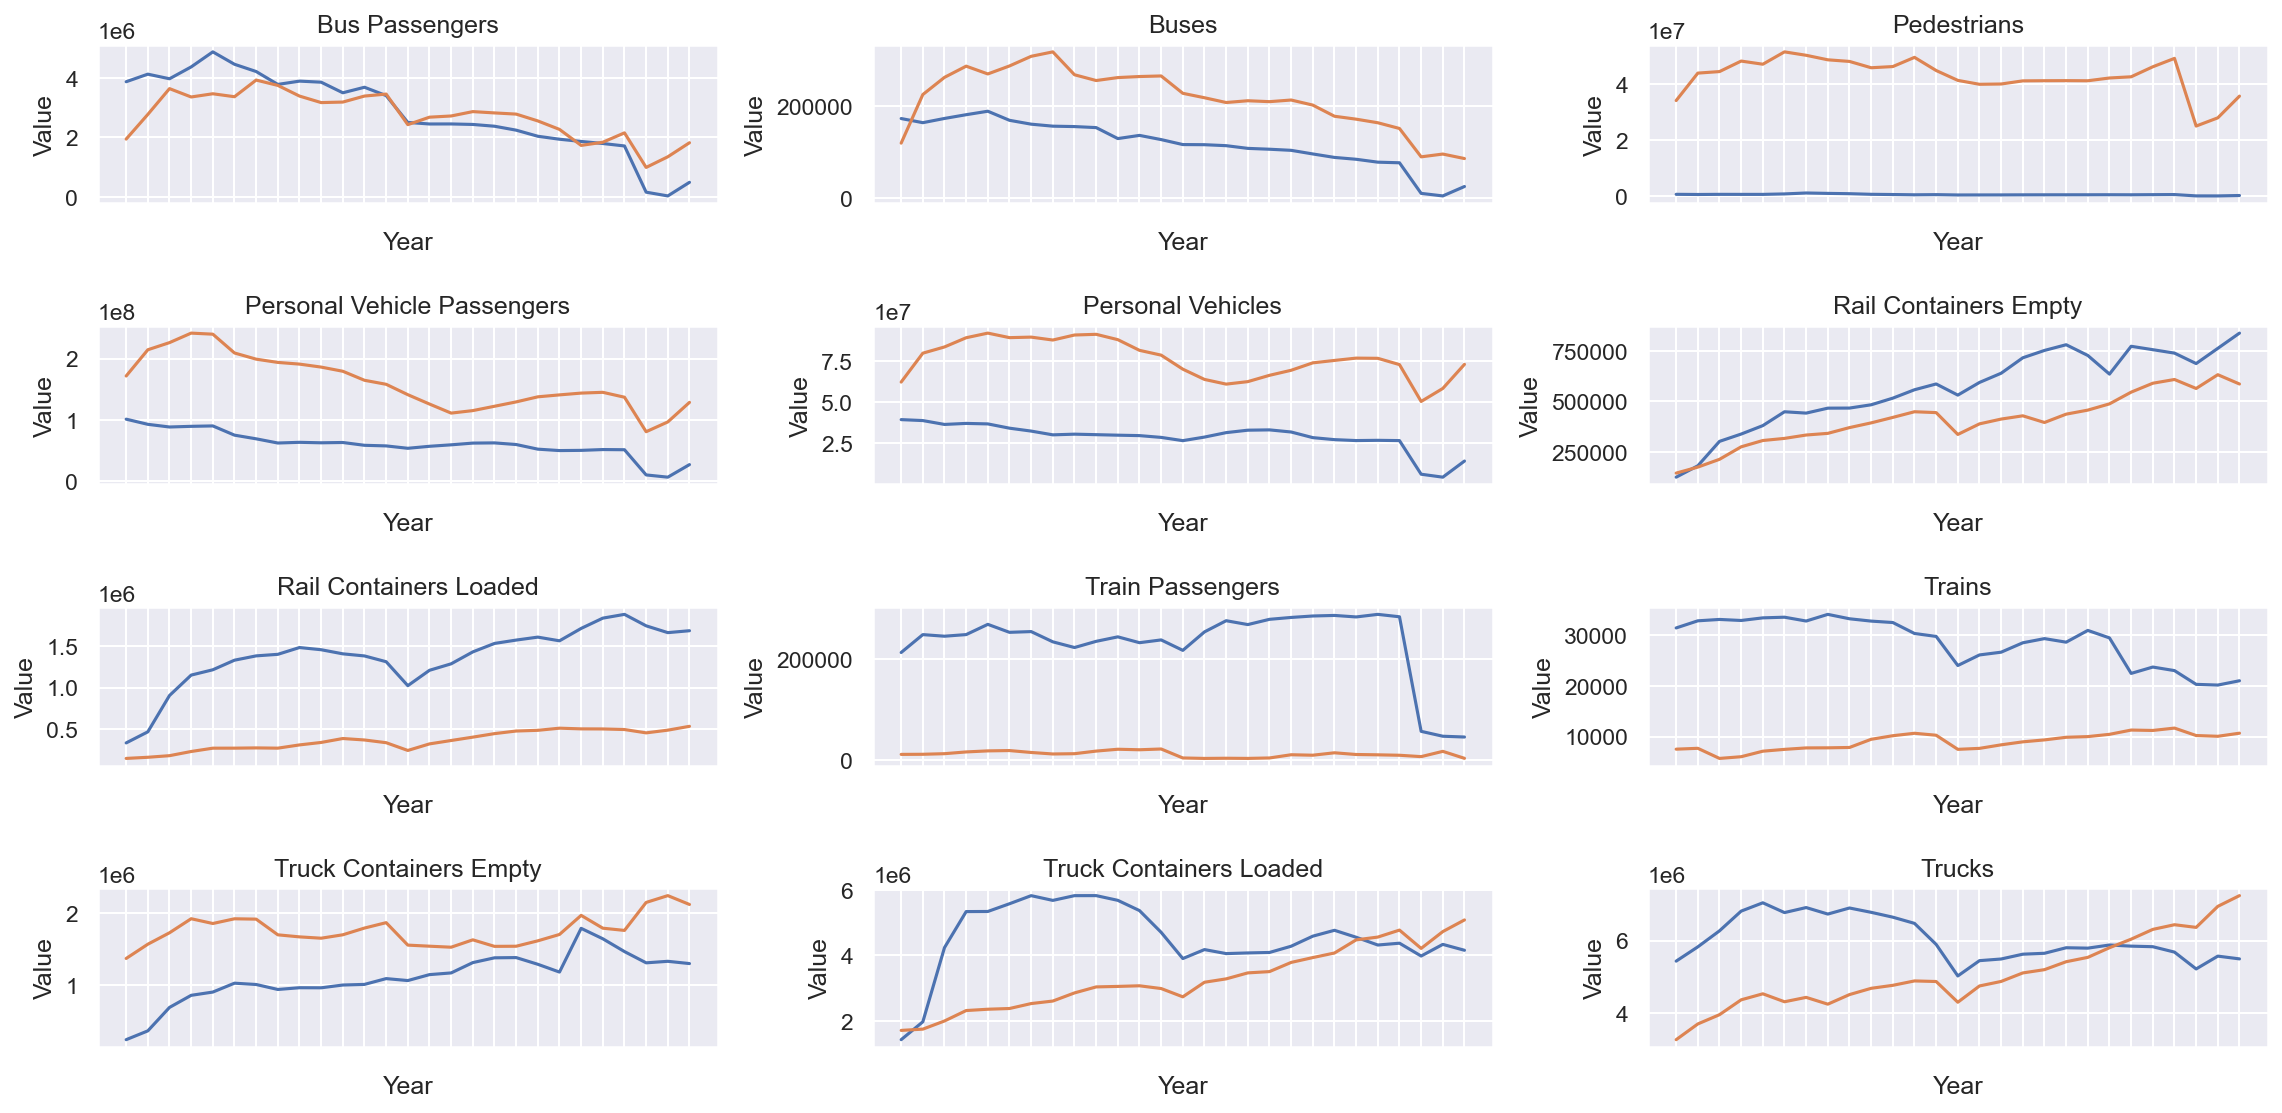

In [6]:
### CODE HERE

canadafilter = border_crossing_full['Border'] == 'CA'
mexicofilter = ~canadafilter

canadacrossings = border_crossing_full.loc[canadafilter]
mexicocrossings = border_crossing_full.loc[mexicofilter]

canada_activity = canadacrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')
mexico_activity = mexicocrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')

fig, axs = plt.subplots(nrows=4,ncols=3)
fig.tight_layout(pad=3)
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0]).title.set_text('Bus Passengers')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).title.set_text('Buses')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).title.set_text('Pedestrians')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).title.set_text('Personal Vehicle Passengers')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).title.set_text('Personal Vehicles')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).title.set_text('Rail Containers Empty')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).title.set_text('Rail Containers Loaded')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).title.set_text('Train Passengers')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).title.set_text('Trains')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).title.set_text('Truck Containers Empty')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).title.set_text('Truck Containers Loaded')
sns.lineplot(canada_activity.loc[canada_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).set_xticklabels([])
sns.lineplot(mexico_activity.loc[mexico_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).title.set_text('Trucks')


*** Observations Question 1 ***

### 2. How do the number of entries change between 1996 until now, and how will they change in the future?

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')
border_crossing_monthly = border_crossing_full.groupby('Date').agg(sum)
border_crossing_monthly['Date'] = border_crossing_monthly.index
border_crossing_monthly.head()

,Port Code,Value,Latitude,Longitude,Date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,Apr 1996
Apr 1997,3041976,38632051,54247.92,-123111.096,Apr 1997
Apr 1998,3041976,42047792,54247.92,-123111.096,Apr 1998
Apr 1999,3041976,43042565,54247.92,-123111.096,Apr 1999
Apr 2000,3041976,44639294,54247.92,-123111.096,Apr 2000


In [64]:
for i in range(0, border_crossing_monthly['Date'].shape[0]):
    month, year = border_crossing_monthly['Date'].iloc[i].split(" ")
    for j in range(0, 12):
        if month=="Jan":
            month = 1
        if month=="Feb":
            month = 2
        if month=="Mar":
            month = 3
        if month=="Apr":
            month = 4
        if month=="May":
            month = 5
        if month=="Jun":
            month = 6
        if month=="Jul":
            month = 7
        if month=="Aug":
            month = 8
        if month=="Sep":
            month = 9
        if month=="Oct":
            month = 10
        if month=="Nov":
            month = 11
        if month=="Dec":
            month = 12
    date = (int(year)-1996)*12 + month
    border_crossing_monthly['Date'].iloc[i] = date
        
border_crossing_monthly.head()

C:\Users\roman\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Port Code,Value,Latitude,Longitude,Date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,4
Apr 1997,3041976,38632051,54247.92,-123111.096,16
Apr 1998,3041976,42047792,54247.92,-123111.096,28
Apr 1999,3041976,43042565,54247.92,-123111.096,40
Apr 2000,3041976,44639294,54247.92,-123111.096,52


<AxesSubplot:xlabel='Date', ylabel='Value'>

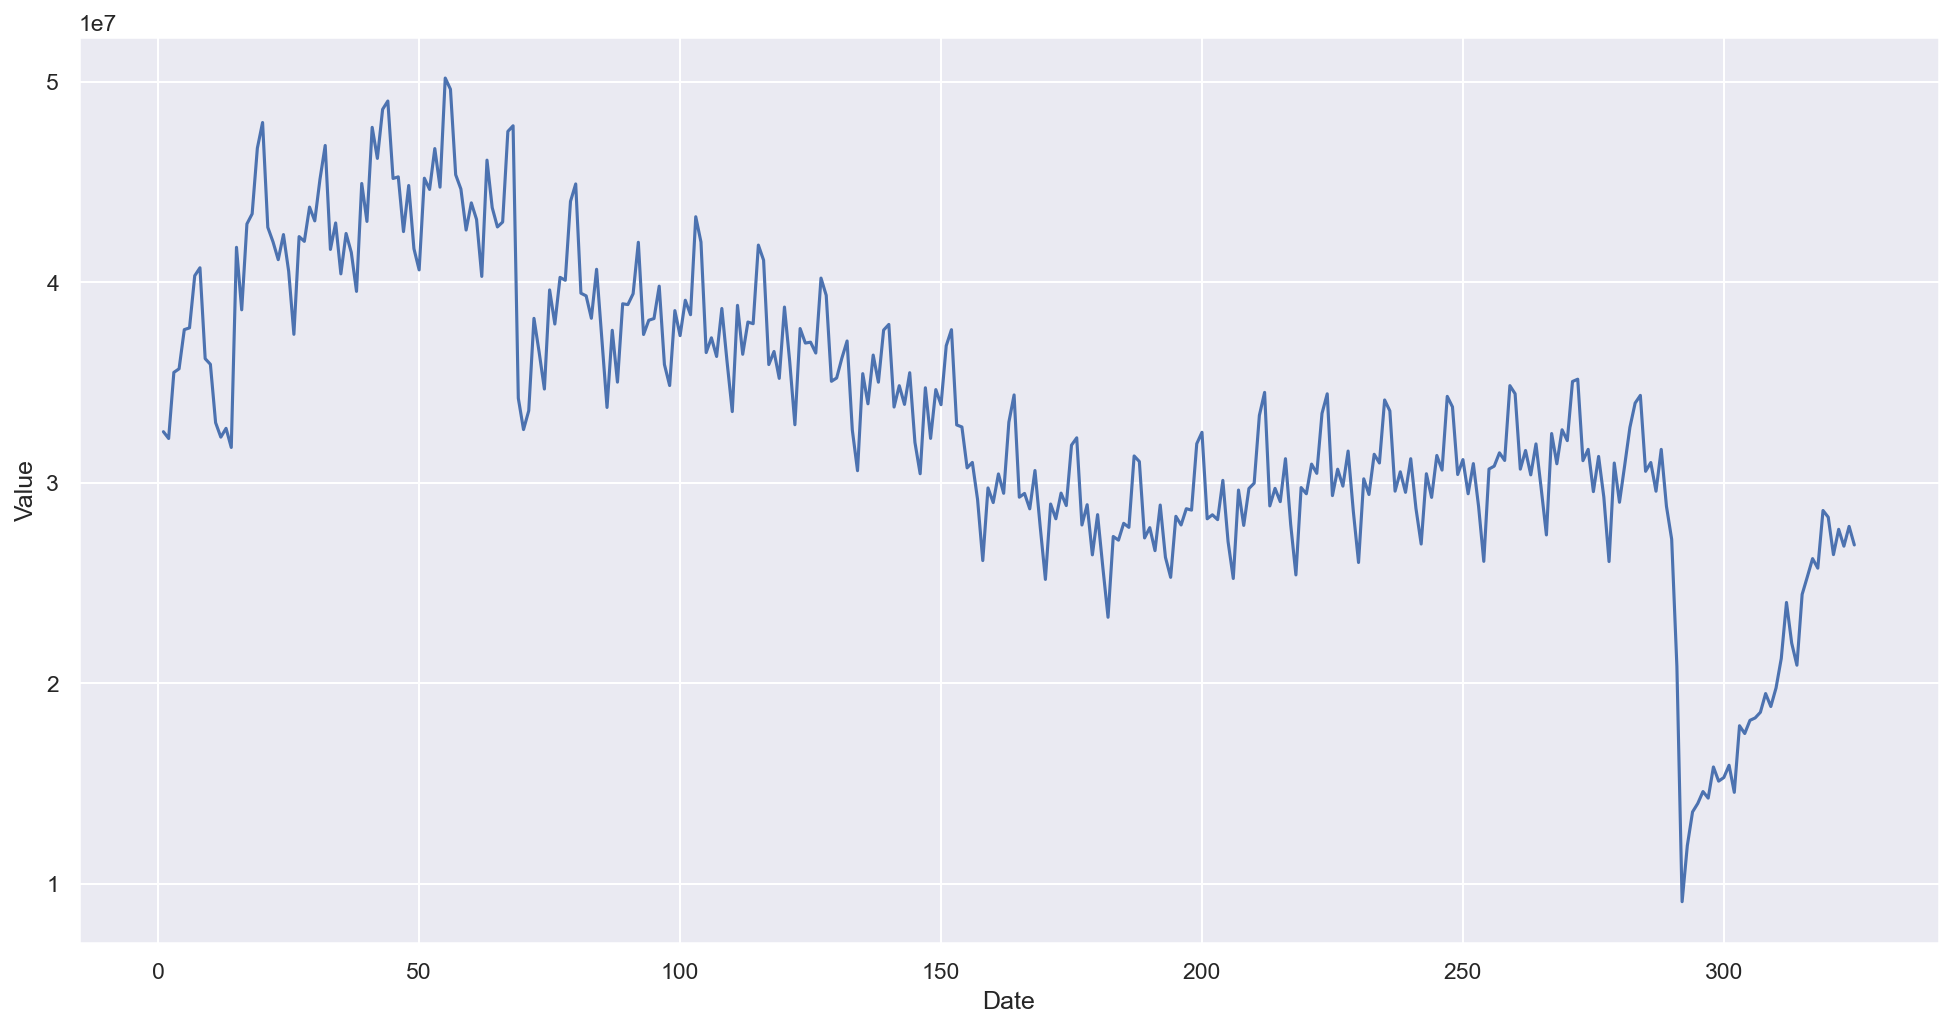

In [65]:
sns.lineplot(border_crossing_monthly,x='Date',y='Value')

In [75]:
decompfreq = 12
model = 'additive'
 
decomposition = seasonal_decompose(
    (border_crossing_monthly.set_index("Date").Value/1e7).interpolate('linear'),
    period = decompfreq,
    model=model)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

print(trend.values)
print(border_crossing_monthly.set_index("Date").Value/1e7)

[       nan        nan        nan        nan        nan        nan
 3.86390078 3.80935511 3.71160535 3.58766562 3.45163999 3.31580803
 3.21444741 3.15579632 3.09880825 3.0419287  2.99357923 2.94800945
 2.83121892 2.68688227 2.62682278 2.67140271 2.81169957 2.97436243
 3.13500047 3.30089946 3.46240511 3.59832738 3.7030445  3.80320188
 3.99068308 4.21516485 4.3587199  4.39830337 4.32880349 4.21138781
 4.07566057 3.92939689 3.8026553  3.70359681 3.62490649 3.55556765
 3.49351123 3.44829717 3.41610429 3.30532675 3.14721341 3.06862044
 3.05718747 3.10336461 3.17750685 3.25385103 3.34040953 3.40207328
 3.4463644  3.49158782 3.52900211 3.64779934 3.82183018 3.92517563
 3.94996551 3.89566274 3.78816162 3.66327829 3.53915321 3.45228116
 3.38530974 3.31164161 3.24351685 3.18281475 3.13036123 3.09041958
 3.0089708  2.91603065 2.8861539  2.89754877 2.91823225 2.95093551
 3.00999018 3.0824393  3.16061117 3.2109387  3.23252977 3.25598738
 3.34533422 3.45835397 3.5068813  3.51112625 3.48027607 3.4058

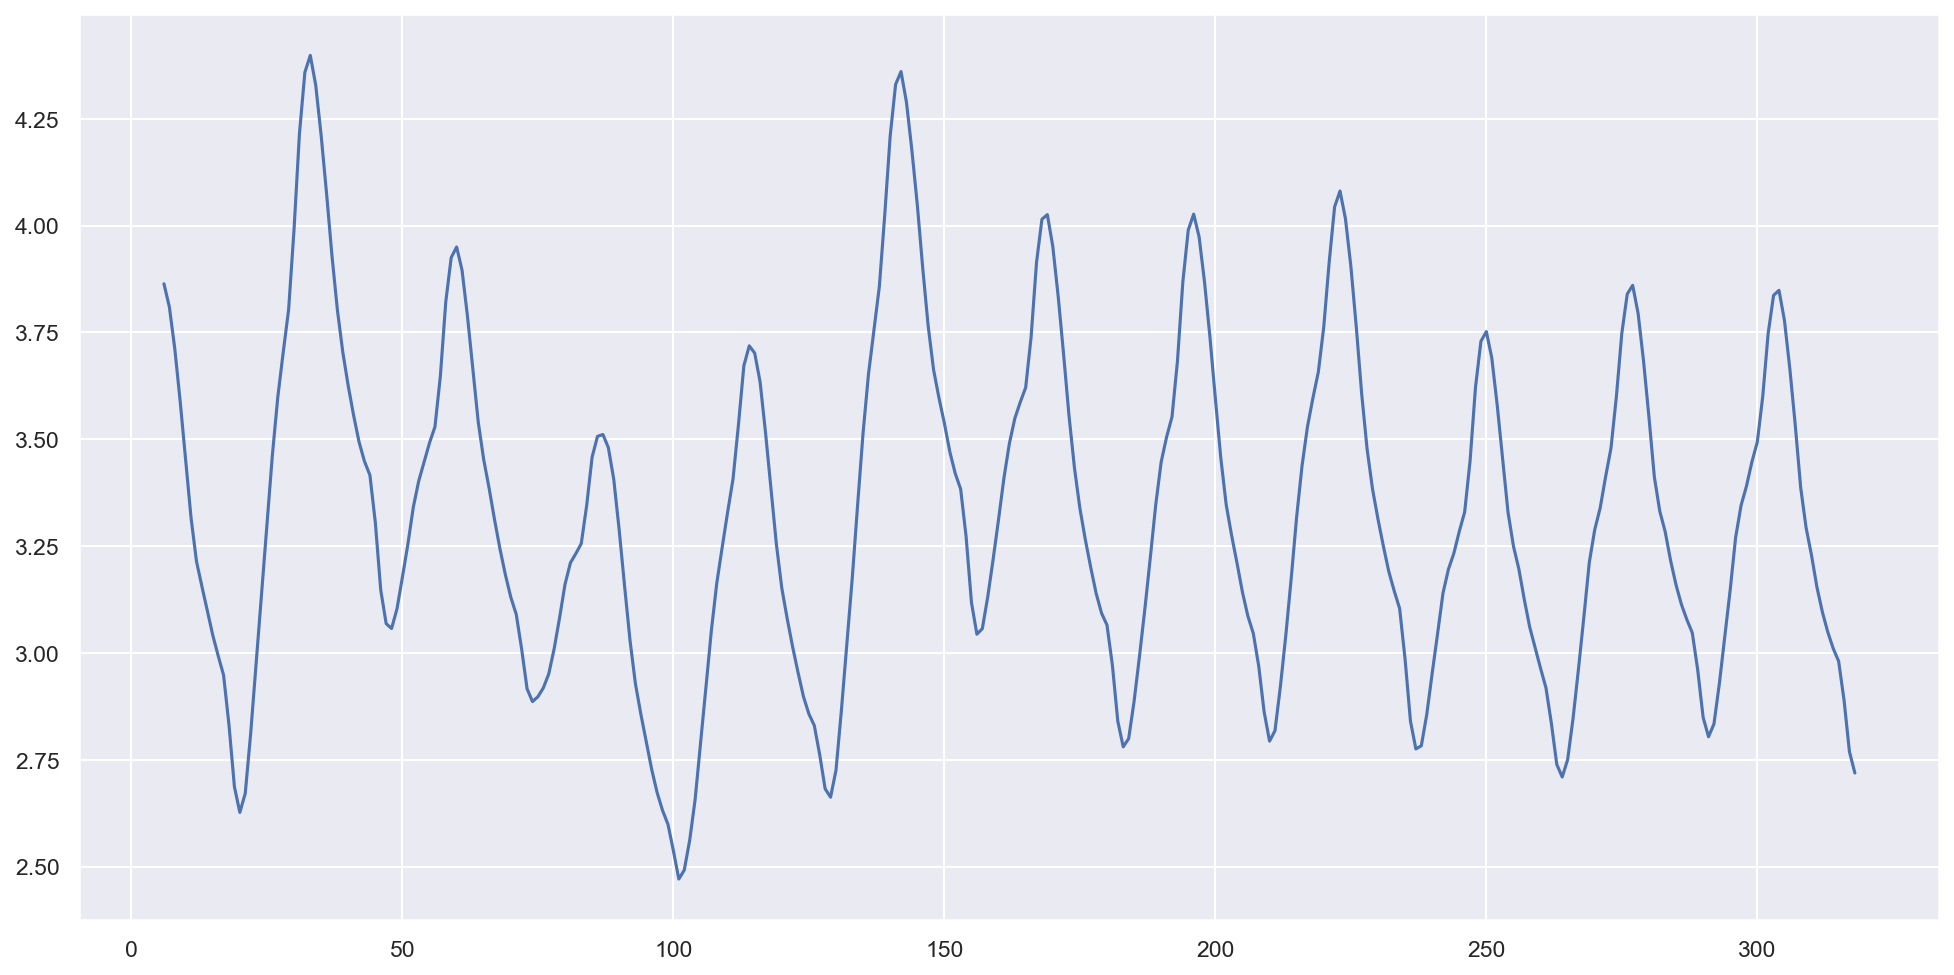

In [79]:
plt.plot(trend.values)

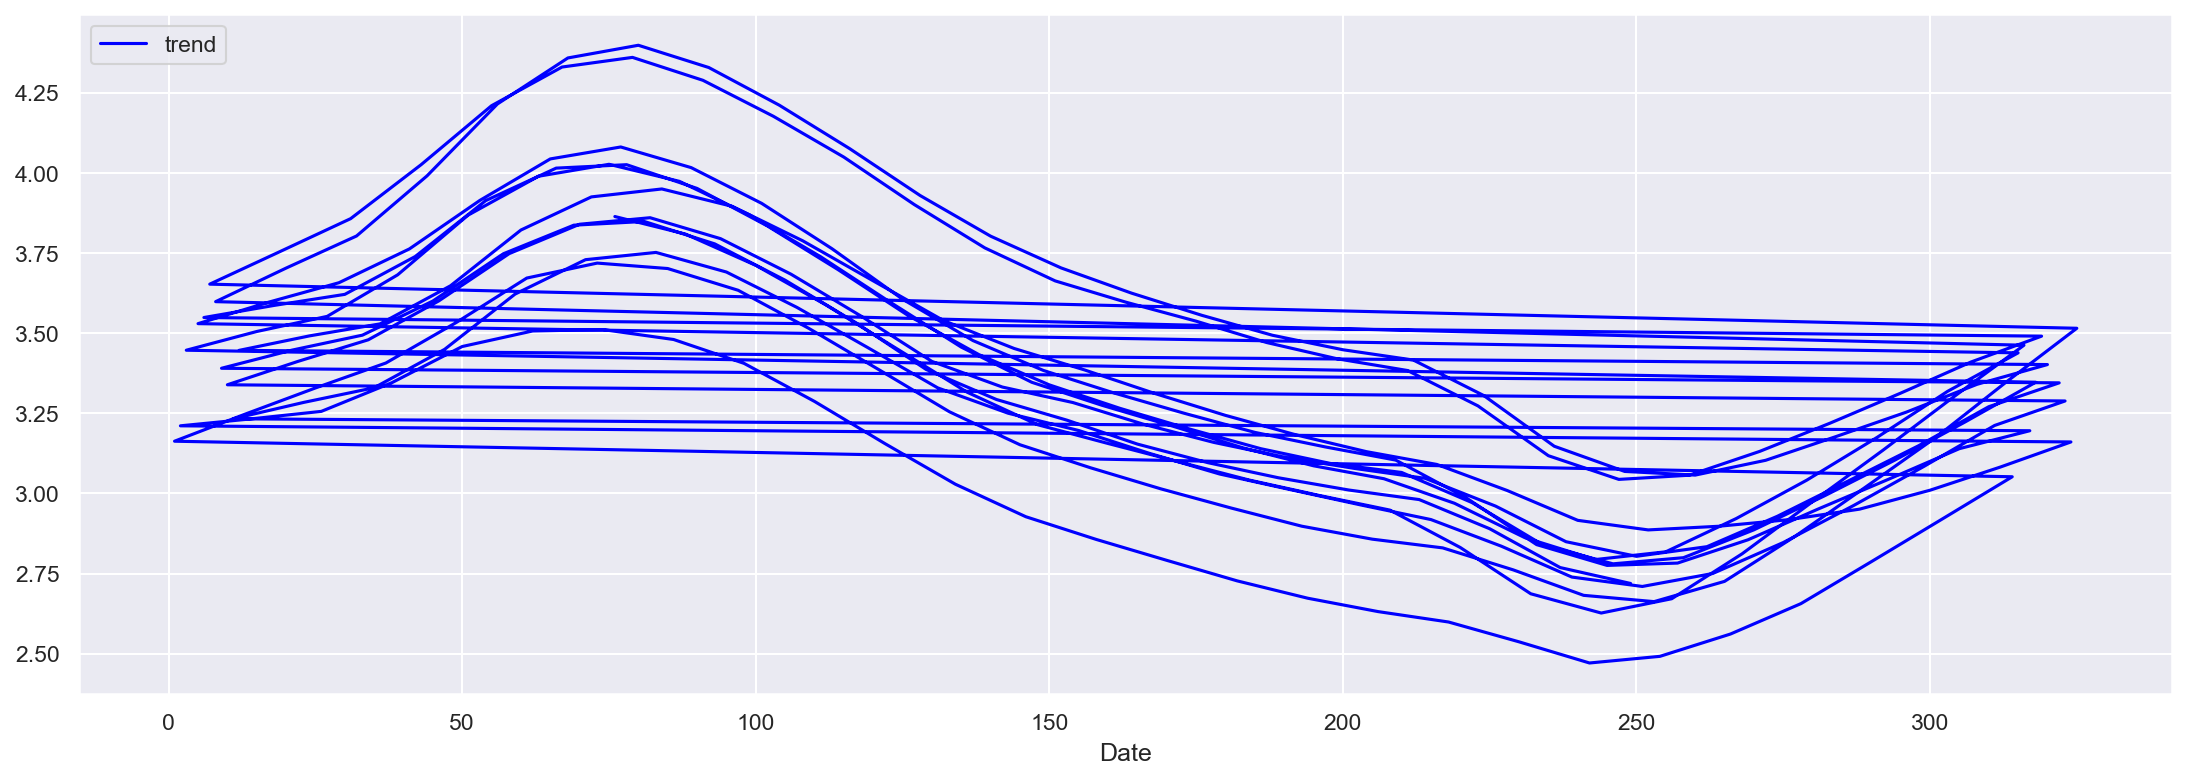

In [76]:
fig, ax = plt.subplots(figsize=(18,6))
trend.plot(ax=ax, label="trend", color="blue")
plt.legend(loc='upper left')

general trend: decreasing (with seasonality)
3 trend changing points (2001, 2010, 2020)
slight increase in beginning till 2001

### 3. How does the mode of transportation vary over time?

In [9]:
### CODE HERE

*** Observations Question 3 ***

### 4. Are there any corrolations between historical events and the entry data?

In [10]:
### CODE HERE

*** Observations Question 4 ***

### 5. Does the activity of the most used ports change over time?

In [11]:
### CODE HERE

*** Observations Question 5 ***